# I Lost My Mule!

I get off my mount for one second to kill an Enderman, next thing I know, my beloved _Muel Camino_ is nowhere to be seen!

Luckily I know how to find them.

## Imports, Setup and Macros

In [1]:
import json
from os import environ
from pathlib import Path
from typing import Any, Collection, Dict

import mutf8
import pandas as pd
from IPython.display import Markdown, display
from nbt import nbt, region

In [2]:
def format_file_size(path: Path) -> str:
    """Print the size of the specified file in
    human-readible form (KB / MB / GB)

    Parameters
    ----------
    path : Path
        The path to the file

    Returns
    -------
    str
        A prettily formatted file size

    Notes
    -----
    I would be shocked if there isn't a utility already built
    into the standard library to do this, but all I could find
    via Googling was a bunch of recipes and examples
    """
    size: float = path.stat().st_size  # in bytes
    for unit in ("B", "KB", "MB", "GB"):
        if size < 1024 / 2:
            return f"{size:.1f} {unit}"
        size = size / 1024
    return f"{size} TB"

In [3]:
def summarize_keystore(keystore: Dict[str, Any]) -> None:
    """Display a summary of the contents of a key-value store

    Parameters
    ----------
    keystore : dict
        The keystore to summarize

    Returns
    -------
    None
    """

    def _summarize_keystore(keystore: Dict[str, Any]) -> str:
        summary = ""
        for k, v in keystore.items():
            summary += f"\n - `{k}` : "
            if isinstance(v, (str, nbt.TAG_String)):
                summary += f'`"{v}"`'
            elif not isinstance(v, Collection):
                summary += f"`{str(v)}`"
            else:
                length = len(v)
                if 0 < length < 3:
                    summary += "\n"
                    if not isinstance(v, Dict):
                        v = {i: item for i, item in enumerate(v)}
                    summary += "\n".join(
                        (f"\t{line}" for line in _summarize_keystore(v).split("\n"))
                    )
                else:
                    summary += f"({len(v)} items)"
        return summary

    display(Markdown(_summarize_keystore(keystore)))

In [4]:
save_folder = Path(environ["SAVE_PATH"])

# make sure this is set correctly
for path in sorted(save_folder.glob("*")):
    print(f"- {path.name} ({'folder' if path.is_dir() else format_file_size(path)})")

- DIM-1 (folder)
- DIM1 (folder)
- advancements (folder)
- data (folder)
- datapacks (folder)
- entities (folder)
- icon.png (8.6 KB)
- level.dat (10.0 KB)
- level.dat_old (10.0 KB)
- playerdata (folder)
- poi (folder)
- region (folder)
- serverconfig (folder)
- session.lock (3.0 B)
- stats (folder)


## Grab my UUID

In [5]:
%%time
level = nbt.NBTFile(save_folder / "level.dat")

CPU times: user 16.6 ms, sys: 271 µs, total: 16.8 ms
Wall time: 16.8 ms


Yeah, I've seen that in filenames.

In [6]:
idiot = tuple(v for v in level["Data"]["Player"]["UUID"])

## Find My Mule

In [7]:
def get_name(entity: Dict[str, Any]) -> str:
    """Return the name (or identifier) of an entity

    Parameters
    ----------
    entity: dict
        The entity of interest

    Returns
    -------
    str
        The name and ID (or just the ID) of the entity
    """
    identifier = entity["id"]

    if "CustomName" not in entity.keys():
        return str(identifier)
    name = json.loads(entity["CustomName"].value)["text"]
    return f"{name} ({identifier})"

In [8]:
%%time
my_pets = []
for path in (save_folder / "entities").glob("*"):
    region_data = region.RegionFile(path)
    for chunk in region_data.iter_chunks():
        for entity in chunk["Entities"]:
            try:
                owner = entity["Owner"]
            except KeyError:
                continue

            identifier = get_name(entity)

            position = ", ".join((str(int(float(str(v)))) for v in entity["Pos"]))

            if tuple(v for v in owner) != idiot:
                continue

            my_pets.append(entity)

            print(f"- Found {identifier} at ({position})")

- Found minecraft:horse at (-1108, 64, -4374)
- Found minecraft:donkey at (-1540, 109, -3954)
- Found minecraft:donkey at (1113, 70, -2819)
- Found minecraft:horse at (-1535, 110, -3954)
- Found Hilux (minecraft:donkey) at (-1526, 111, -3955)
- Found minecraft:donkey at (-1525, 111, -3943)
- Found minecraft:horse at (-1520, 110, -3950)
- Found Horsche 911 (minecraft:horse) at (-1524, 112, -3948)
- Found minecraft:horse at (-1510, 110, -3959)
- Found Ferrar-neigh (minecraft:horse) at (-1515, 111, -3956)
- Found Pangers (minecraft:cat) at (-1505, 107, -3923)
- Found Nethernugg (minecraft:cat) at (-1504, 108, -3928)
- Found Ridgeline (minecraft:donkey) at (-1488, 107, -3956)
- Found Mare-claren F1 (minecraft:horse) at (-1488, 107, -3956)
- Found Lamborghi-neigh (minecraft:horse) at (-1488, 107, -3956)
- Found minecraft:donkey at (-1487, 107, -3957)
- Found Jabber (minecraft:parrot) at (550, 78, -2541)
- Found The Perilous Poozer (minecraft:cat) at (550, 78, -2541)
- Found Cavecat (minecra

All right. I'm off.

## _A Short Time Later_

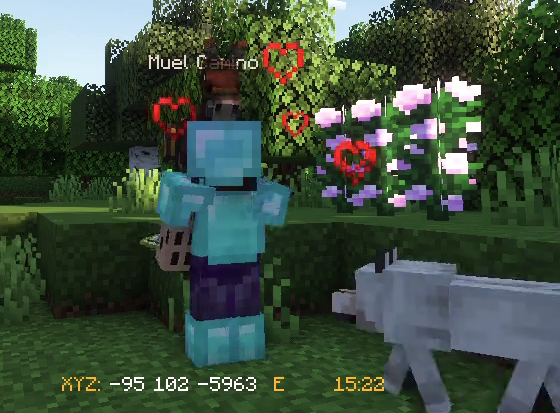